In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

### 데이터 읽어오기

In [2]:
chipo = pd.read_csv('data10/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
# 데이터 프레임 정보 확인
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
# 결측치 확인
chipo.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [5]:
# 컬럼명 확인
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
# 인덱스 확인
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 요약 통계 정보를 확인해 본다.

In [7]:
# 숫자 데이터에 대한 요약 통계 정보
# count : 결측치를 제외한 로우의 개수
# mean : 결측치를 제외한 평균
# std : 결측치를 제외한 표준편차
# min : 결측치를 제외한 최소값
# 25% : 결측치를 제외한 25% 위치값
# 50% : 결측치를 제외한 50% 위치값
# 75% : 결측치를 제외한 75% 위치값
# max : 결측치를 제외한 최대값
chipo[['order_id', 'quantity']].describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [8]:
# 문자열 컬럼의 요약 통계 정보
# count : 결측치를 제외한 로우의 개수
# unique : 중복을 제외하고 문자열의 개수(저장된 값의 종류)
# top : 가장 많이 나온 문자열
# ferq : top 문자열이 저장된 개수
chipo[['item_name', 'choice_description', 'item_price']].describe()

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


### 레이블형 데이터의 데이터 종류 수 출력

In [9]:
# 중복을 제외하고 가져온다.
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [10]:
len(chipo['item_name'].unique())

50

### 가장 많이 주문한 item 파악하기

In [11]:
# 상품 이름 컬럼에 값이 몇 개씩 저장되어 있는지 가지고 온다.
item_count = chipo['item_name'].value_counts()
# 상위 10개만 추출한다.
item_count = item_count[:10]
item_count

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [12]:
# 가장 많이 주문한 음식을 가져온다.
a1 = chipo['item_name'].value_counts().index[0]
print(f'가장 많이 주문한 음식 : {a1}')

가장 많이 주문한 음식 : Chicken Bowl


### item 당 주문 개수와 총량을 구한다.

In [13]:
# item당 주문 개수를 가져온다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count.sort_values(ascending=False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [14]:
# item 당 주문 총량을 출력한다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity.sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


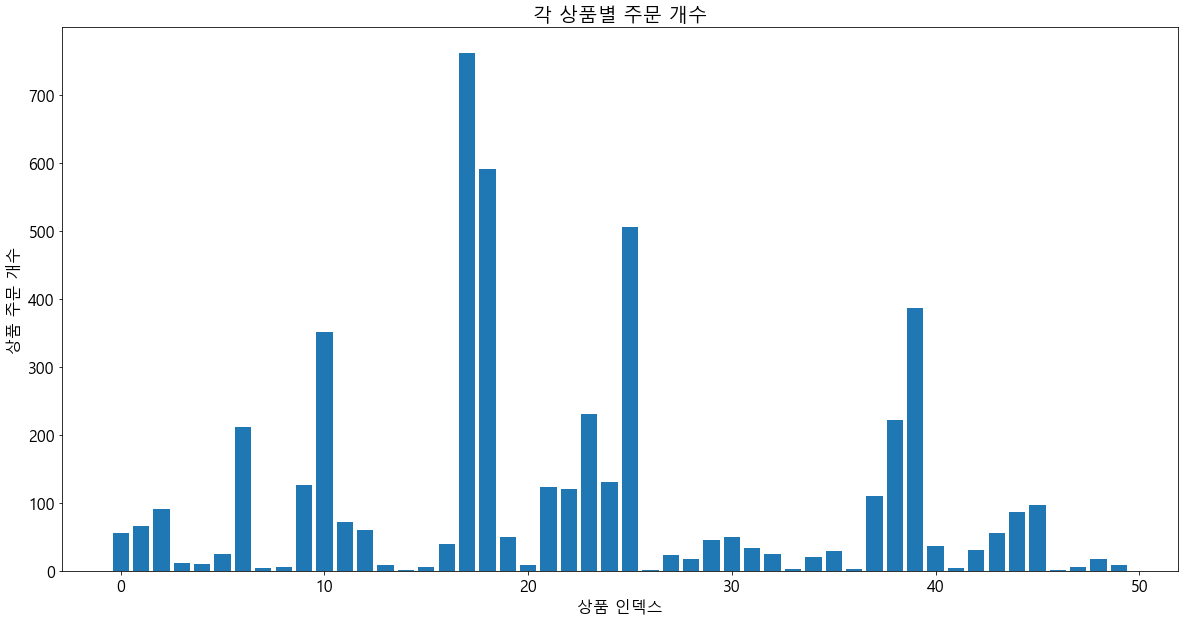

In [15]:
# 상품 이름을 리스트로 추출한다.
item_name_list = item_quantity.index.tolist()
# x 축(상품의 개수만큼 값이 들어있는 range)
x_pos = np.arange(len(item_name_list))
# 상품별 주문 개수
order_cnt = item_quantity.values.tolist()

# 시각화
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('상품 주문 개수')
plt.xlabel('상품 인덱스')
plt.title('각 상품별 주문 개수')

plt.show()

### apply와 lambda함수를 이용한 데이터 전처리

In [16]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [17]:
# 상품 가격 출력
chipo['item_price']

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [18]:
# 컬럼 단위 데이터에 apply함수를 통해 전처리를 한다
chipo['item_price'] = chipo['item_price'].apply(lambda x:float(x[1:]))
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [19]:
chipo['item_price'].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

### 문제
- 주문당 평균 계산 금액출력
- 한 주문에 10달러 이상 사용한 주문의 id를 출력한다
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렷는지
- 'Veggie Salad Bowl'이 몇번 주문 되었는지
- 'Chiken Bowl'을 2개이상 주문한 주문 횟수 구하기

In [20]:
chipo.groupby('order_id').mean()['item_price']

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

In [21]:
chipo.groupby('order_id').sum()['item_price']>10

order_id
1       True
2       True
3       True
4       True
5       True
        ... 
1830    True
1831    True
1832    True
1833    True
1834    True
Name: item_price, Length: 1834, dtype: bool

In [53]:
b = chipo.loc[chipo['item_price'].idxmax()]['order_id']

In [54]:
chipo.loc[chipo['order_id']==b]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3599,1443,7,Bottled Water,NaN,10.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75
3604,1443,2,Bottled Water,NaN,3.00


In [58]:
chipo.loc[chipo['item_name']=='Veggie Salad Bowl'].count()

order_id              18
quantity              18
item_name             18
choice_description    18
item_price            18
dtype: int64

In [75]:
df = chipo[chipo['item_name']=='Chicken Bowl']

In [115]:
df[df['quantity']>=2]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
654,271,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
976,401,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1017,418,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Black Beans]]",17.50
1106,457,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50


### 풀이

In [121]:
# choice_descript이 결측치인것들
a1 = chipo['choice_description'].isna()
a2 = chipo[a1]
# quantity가 두개인것을 가저온다
a3 = a2.query('quantity==2')
display(a3)
# quantity가 한개인것을 가저온다
a4 = a2.query('quantity==1')
display(a4)
a4[a4['item_name']=='Chips']

,order_id,quantity,item_name,choice_description,item_price
223,98,2,Chips,NaN,4.3
235,103,2,Chips and Tomatillo Green Chili Salsa,NaN,5.9
540,225,2,Bottled Water,NaN,3.0
792,326,2,Chips and Guacamole,NaN,8.9
828,343,2,Chips,NaN,4.3
...,...,...,...,...,...
4312,1719,2,Chips and Tomatillo Red Chili Salsa,NaN,5.9
4332,1729,2,Chips and Guacamole,NaN,8.9
4389,1751,2,Chips,NaN,4.3
4417,1761,2,Chips,NaN,4.3


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
6,3,1,Side of Chips,NaN,1.69
10,5,1,Chips and Guacamole,NaN,4.45
14,7,1,Chips and Guacamole,NaN,4.45
...,...,...,...,...,...
4600,1827,1,Chips and Guacamole,NaN,4.45
4605,1828,1,Chips and Guacamole,NaN,4.45
4613,1831,1,Chips,NaN,2.15
4614,1831,1,Bottled Water,NaN,1.50


,order_id,quantity,item_name,choice_description,item_price
40,19,1,Chips,NaN,2.15
59,27,1,Chips,NaN,2.15
77,34,1,Chips,NaN,2.15
80,35,1,Chips,NaN,2.15
208,92,1,Chips,NaN,2.15
...,...,...,...,...,...
4505,1791,1,Chips,NaN,2.15
4509,1793,1,Chips,NaN,1.99
4525,1799,1,Chips,NaN,2.15
4584,1823,1,Chips,NaN,2.15


chips가 추가주문이 없을경우 1개주문하면 2.15달러이고 2개 주문하면 4.3달러이다
따라서 item_price컬럼은 상품가격에 quantity를 곱한 값이 된다.

In [122]:
# 주문당 평균을 구한다
chipo.groupby('order_id')['item_price'].mean()

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

In [123]:
# 주문당 총합을 구한다
chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

### 한 주문에 10달러 이상 사용한 주문의 id를 출력한다

In [124]:
# 데이터 프레임 확인
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [132]:
# 각 주문별 총 주문 금액을 구한다
a1 = chipo.groupby('order_id')['item_price'].sum()
a1

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [135]:
# 주문 총 금액이 20달러 보다 큰지 결과를 확인한다
a2 = a1>=20
a2

order_id
1       False
2       False
3       False
4        True
5       False
        ...  
1830     True
1831    False
1832    False
1833     True
1834     True
Name: item_price, Length: 1834, dtype: bool

In [136]:
# 결과
a3 = a1[a2]
chipo.loc[a3.index]

,order_id,quantity,item_name,choice_description,item_price
order_id,,,,,
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
18,9,2,Canned Soda,[Sprite],2.18
20,10,1,Chips and Guacamole,NaN,4.45
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
1827,739,1,Chicken Burrito,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1829,740,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice]]",8.75
1830,740,1,Chips,NaN,2.15


### 각상품의 가격 구하기

In [137]:
# 데이터프레임 확인
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [141]:
# 상품의 종류 개수를 가져온다.
a1 = chipo['item_name'].value_counts()
len(a1.index)

50

In [145]:
# 한개만 팔린 상품의 종류 개수를 가져온다.
a1 = chipo.query('quantity ==1')
a2 = a1['item_name'].value_counts()
len(a2.index)

50

1개만 팔린 상품 목록안에 모든 상품들이 포함되어있다

In [146]:
# 1개만 팔린 상품 목록을 가져온다.
chipo_one_item = chipo.query('quantity ==1')
chipo_one_item

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [156]:
# 과연 한가지 상품의 가격은 모두 동일한지 확인한다
a1 = chipo_one_item.query('item_name =="Chips and Fresh Tomato Salsa"')
a1

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
25,13,1,Chips and Fresh Tomato Salsa,NaN,2.39
55,25,1,Chips and Fresh Tomato Salsa,NaN,2.39
89,39,1,Chips and Fresh Tomato Salsa,NaN,2.95
183,82,1,Chips and Fresh Tomato Salsa,NaN,2.95
...,...,...,...,...,...
4231,1689,1,Chips and Fresh Tomato Salsa,NaN,2.95
4318,1722,1,Chips and Fresh Tomato Salsa,NaN,2.95
4324,1725,1,Chips and Fresh Tomato Salsa,NaN,2.95
4425,1764,1,Chips and Fresh Tomato Salsa,NaN,2.95


In [157]:
# 동일하지 않는 원인을 확인해본다
# 추가주문이 없는 것들만 확인한다
# 1개만 주문한 가격중에 추가 주문이 없는 것들
a3 = a1['choice_description'].isna()
a4 = a1[a3]
a5 = a4['item_price']
a5.value_counts

<bound method IndexOpsMixin.value_counts of 0       2.39
25      2.39
55      2.39
89      2.95
183     2.95
        ... 
4231    2.95
4318    2.95
4324    2.95
4425    2.95
4503    2.95
Name: item_price, Length: 105, dtype: float64>

In [162]:
# 하나의 상품에 대해 여러가지 값이 존재하는 상황이므로 최소값으로 구한다.
# 각 상품별 최소값을 구한다.
a1 = chipo_one_item.groupby('item_name').min()
price_per_item = a1['item_price']
price_per_item

item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

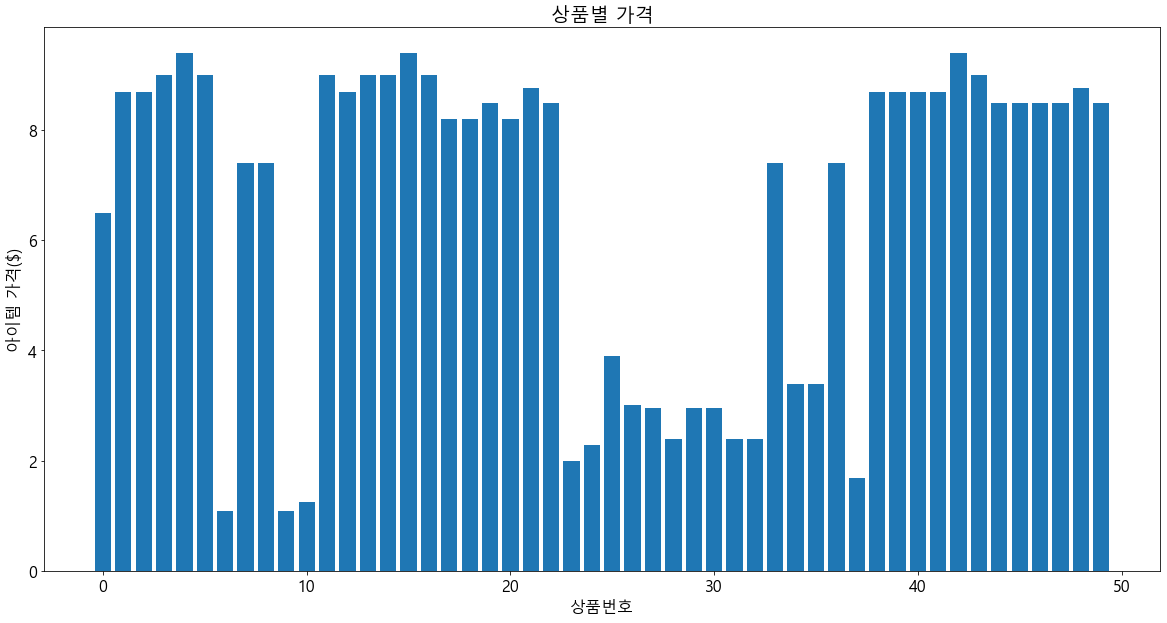

In [167]:
# 아이템 가격 분포 그래프를 출력한다
item_name_list = price_per_item.index
# item_name_list
# 상품의 이름의 수 만큼 들어있는 리스트를 생성한다
x_pos = np.arange(len(item_name_list))
# 가격 
item_price = price_per_item.values

plt.bar(x_pos,item_price,align = 'center')
plt.ylabel('아이템 가격($)')
plt.xlabel('상품번호')
plt.title('상품별 가격')
plt.show()

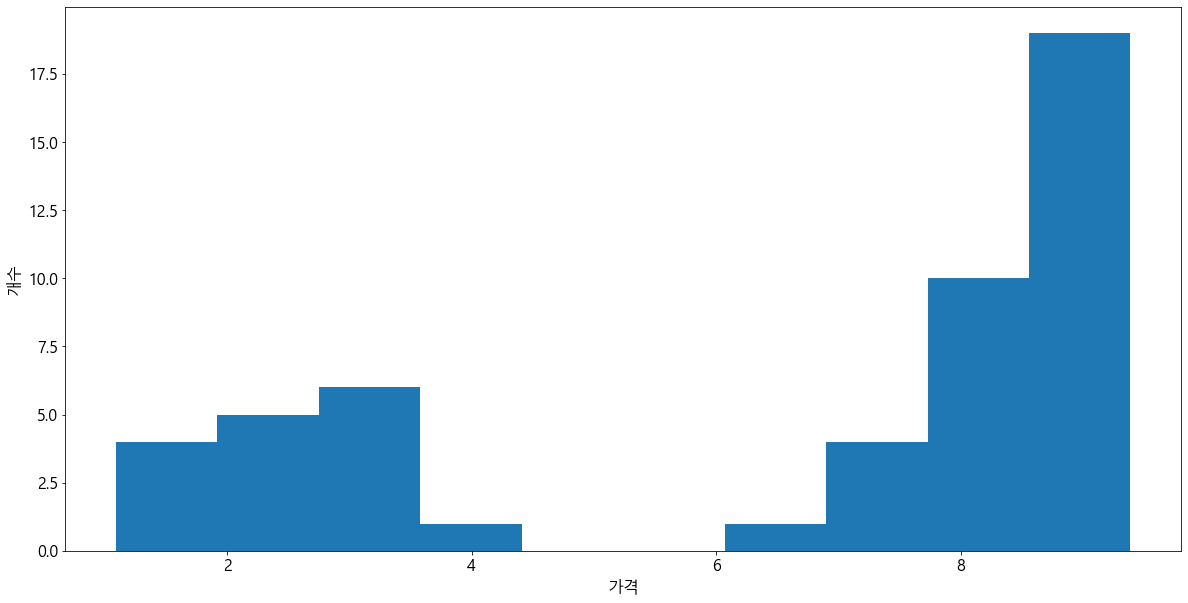

In [173]:
# 아이템가격 히스토그램
plt.hist(item_price)
plt.ylabel('개수')
plt.xlabel('가격')
plt.show()

In [174]:
item_price

array([6.49, 8.69, 8.69, 8.99, 9.39, 8.99, 1.09, 7.4 , 7.4 , 1.09, 1.25,
       8.99, 8.69, 8.99, 8.99, 9.39, 8.99, 8.19, 8.19, 8.49, 8.19, 8.75,
       8.49, 1.99, 2.29, 3.89, 3.  , 2.95, 2.39, 2.95, 2.95, 2.39, 2.39,
       7.4 , 3.39, 3.39, 7.4 , 1.69, 8.69, 8.69, 8.69, 8.69, 9.39, 8.99,
       8.49, 8.49, 8.49, 8.49, 8.75, 8.49])

item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

### 가장 비싼 주문에서 item이 몇개 팔렷는지

In [176]:
# 데이터프레임 확인
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [178]:
# order_id를 기준으로 총합을 구한다
a1 = chipo.groupby('order_id').sum()
a1

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [179]:
# 총가격을 기준으로 정렬한다
a2 = a1.sort_values(by = 'item_price',ascending=False)

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
17,2,10.08
889,2,10.08
1014,2,10.08


In [189]:
a3 = a2.reset_index()
a3
print(f'주문번호는 : {a3.iloc[0][0]}')

주문번호는 : 926.0


### 'Veggie Salad Bowl'이 몇번주문되었는지

In [190]:
chipo_salad = chipo.query('item_name == "Veggie Salad Bowl"')
chipo_salad

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


In [191]:
print(f'총 주문 횟수 : {len(chipo_salad)}')

총 주문 횟수 : 18


### 'Chicken Bowl'을 2개이상 주문한 주문횟수 구하기

In [193]:
# chicken bowl을 주문한 주문
a1 = chipo.query('item_name == "Chicken Bowl"')
a1

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


In [195]:
# 2개이상인 주문을 가져온다
a2 = a1.query('quantity >=2')
print(f'총:{len(a2)}건')

총:33건


In [ ]:
# id